In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score,roc_auc_score, mean_squared_error
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import Pipeline
import shap
from sklearn.inspection import PartialDependenceDisplay
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression



pd.set_option('display.max_columns', None)

In [2]:
file= pd.read_csv('Customer-Churn-Records.csv')

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [4]:
file.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
df_cln=file.drop(columns=['CustomerId','Surname'])

In [6]:
df_customer_id=file[['CustomerId','Surname']]

In [7]:
df_customer_id

,CustomerId,Surname
0,15634602,Hargrave
1,15647311,Hill
2,15619304,Onio
3,15701354,Boni
4,15737888,Mitchell
...,...,...
9995,15606229,Obijiaku
9996,15569892,Johnstone
9997,15584532,Liu
9998,15682355,Sabbatini


In [8]:
df_cln=df_cln.drop('RowNumber', axis=1)

In [9]:
df_cln

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [10]:
df_cln=pd.get_dummies(df_cln, columns=['Geography', 'Gender', 'Card Type']).astype(int)

In [11]:
df_cln

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0,1,1,1,101348,1,1,2,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,3,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660,3,1,0,113931,1,1,3,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,5,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510,1,1,1,79084,0,0,5,425,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,1,300,1,0,0,0,1,1,0,0,0
9996,516,35,10,57369,1,1,1,101699,0,0,5,771,1,0,0,0,1,0,0,1,0
9997,709,36,7,0,1,0,1,42085,1,1,3,564,1,0,0,1,0,0,0,0,1
9998,772,42,3,75075,2,1,0,92888,1,1,2,339,0,1,0,0,1,0,1,0,0


In [12]:
df_cln=df_cln.astype(int)

In [13]:
df_cln

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0,1,1,1,101348,1,1,2,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,3,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660,3,1,0,113931,1,1,3,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,5,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510,1,1,1,79084,0,0,5,425,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,1,300,1,0,0,0,1,1,0,0,0
9996,516,35,10,57369,1,1,1,101699,0,0,5,771,1,0,0,0,1,0,0,1,0
9997,709,36,7,0,1,0,1,42085,1,1,3,564,1,0,0,1,0,0,0,0,1
9998,772,42,3,75075,2,1,0,92888,1,1,2,339,0,1,0,0,1,0,1,0,0


In [14]:
X=df_cln.drop('Exited', axis=1)
y=df_cln['Exited']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
std=StandardScaler()
# X_train_scaled=std.fit_transform(X_train)
# X_test_scaled=std.transform(X_test)

# First Balance with SMOTE

In [17]:
sm = SMOTE(random_state=42)
X_tr_bal, y_tr_bal = sm.fit_resample(X_train, y_train)

In [21]:
pipe= Pipeline([
    ('scaler',std),
    ('classifier',RandomForestClassifier())
])

params=[
{'classifier': [LogisticRegression()],
     'classifier__penalty': ['l2']
     },

    
    
    {'classifier': [RandomForestClassifier()],
     'classifier__n_estimators': [100],
     'classifier__n_jobs': [3]
    },
    
    
    
    {'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': [10],
     'classifier__n_jobs': [3]
    },
            

    {'classifier': [AdaBoostClassifier()],
     'classifier__n_estimators': [100],
     'classifier__learning_rate': [0.01]
    },
   
    
    {'classifier': [GradientBoostingClassifier()],
     'classifier__learning_rate': [0.01],
     'classifier__n_estimators': [100]
    },
     
    
    {'classifier': [svm.SVC()],
     'classifier__kernel': ['linear'],
    },
        
     
    {'classifier': [XGBClassifier()],
    'classifier__learning_rate': [0.1],
     'classifier__n_estimators': [100],
    'classifier__max_depth': [10]
    },
     
     
    {'classifier': [LGBMClassifier()],
     'classifier__learning_rate': [0.01],
    }    
]

In [22]:
CV = GridSearchCV(pipe,params,scoring='recall_micro',cv=5, error_score='raise', verbose=1, n_jobs=-1)

In [23]:
CV.fit(X_tr_bal, y_tr_bal)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__penalty': ['l2']},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__n_estimators': [100],
                          'classifier__n_jobs': [3]},
                         {'classifier': [KNeighborsCl...
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       multi_strategy=None,
                                                       n_estimators=None,
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       random_state=None, ...)],
                          'classifier__learning_rate': [0.1],
                          'classifier__max_depth': [10],
                          'classifier__n_estimators': [100]},
                         {'classifier': [LGBMClassifier()],
                          'classifier__learning_rate': [0.01]}],
             scoring='recall_micro', verbose=1)

In [25]:
pd.DataFrame(CV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__penalty,param_classifier__n_estimators,param_classifier__n_jobs,param_classifier__n_neighbors,param_classifier__learning_rate,param_classifier__kernel,param_classifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.075597,0.016728,0.012565,0.004951,LogisticRegression(),l2,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",0.998426,0.998426,0.999607,0.998820,0.998820,0.998820,0.000431,2
1,0.879404,0.011056,0.103323,0.026534,RandomForestClassifier(),NaN,100.0,3.0,NaN,NaN,NaN,NaN,"{'classifier': RandomForestClassifier(), 'clas...",0.998820,0.998033,0.998426,0.998426,0.998820,0.998505,0.000294,4
2,0.028839,0.006387,1.039024,0.177190,KNeighborsClassifier(),NaN,NaN,3.0,10.0,NaN,NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.816680,0.964201,0.998820,0.998033,0.998426,0.955232,0.070533,8
3,1.786137,0.115543,0.081091,0.009639,AdaBoostClassifier(),NaN,100.0,NaN,NaN,0.01,NaN,NaN,"{'classifier': AdaBoostClassifier(), 'classifi...",0.998426,0.998033,0.998426,0.998033,0.998426,0.998269,0.000193,6
4,3.085463,0.216556,0.012168,0.001465,GradientBoostingClassifier(),NaN,100.0,NaN,NaN,0.01,NaN,NaN,"{'classifier': GradientBoostingClassifier(), '...",0.998820,0.998033,0.998426,0.997246,0.999213,0.998348,0.000677,5
5,0.159800,0.043267,0.024145,0.001459,SVC(),NaN,NaN,NaN,NaN,NaN,linear,NaN,"{'classifier': SVC(), 'classifier__kernel': 'l...",0.998426,0.998426,1.000000,0.998820,0.999607,0.999056,0.000639,1
6,0.381763,0.079392,0.022558,0.011088,"XGBClassifier(base_score=None, booster=None, c...",NaN,100.0,NaN,NaN,0.10,NaN,10.0,"{'classifier': XGBClassifier(base_score=None, ...",0.999213,0.998033,0.998820,0.998820,0.999213,0.998820,0.000431,2
7,1.561079,0.108382,0.013166,0.001714,LGBMClassifier(),NaN,NaN,NaN,NaN,0.01,NaN,NaN,"{'classifier': LGBMClassifier(), 'classifier__...",0.998426,0.998033,0.998426,0.998033,0.998426,0.998269,0.000193,6


In [26]:
X_tr_new=X_tr_bal.drop('Complain', axis=1)

In [27]:
CV.fit(X_tr_new, y_tr_bal)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__penalty': ['l2']},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__n_estimators': [100],
                          'classifier__n_jobs': [3]},
                         {'classifier': [KNeighborsCl...
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       multi_strategy=None,
                                                       n_estimators=None,
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       random_state=None, ...)],
                          'classifier__learning_rate': [0.1],
                          'classifier__max_depth': [10],
                          'classifier__n_estimators': [100]},
                         {'classifier': [LGBMClassifier()],
                          'classifier__learning_rate': [0.01]}],
             scoring='recall_micro', verbose=1)

In [28]:
CV.best_score_

0.8899291896144768

In [29]:
X_test.drop('Complain', axis=1, inplace=True)

In [30]:
print(classification_report(y_test,CV.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1607
           1       0.69      0.55      0.61       393

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.86      2000



In [ ]:
explainer = shap.Explainer(CV.predict, X_test)
shap_values = explainer(X_test)

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.summary_plot(shap_values)


# Second Attempt Near Miss

In [31]:
nm=NearMiss()
X_train_new=X_train.drop('Complain', axis=1)

X_nm_tr,y_nm_tr=nm.fit_resample(X_train_new,y_train)


In [32]:
CV.fit(X_nm_tr,y_nm_tr)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__penalty': ['l2']},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__n_estimators': [100],
                          'classifier__n_jobs': [3]},
                         {'classifier': [KNeighborsCl...
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       multi_strategy=None,
                                                       n_estimators=None,
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       random_state=None, ...)],
                          'classifier__learning_rate': [0.1],
                          'classifier__max_depth': [10],
                          'classifier__n_estimators': [100]},
                         {'classifier': [LGBMClassifier()],
                          'classifier__learning_rate': [0.01]}],
             scoring='recall_micro', verbose=1)

In [34]:
print(classification_report(y_test,CV.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.35      0.51      1607
           1       0.25      0.90      0.40       393

    accuracy                           0.46      2000
   macro avg       0.60      0.63      0.46      2000
weighted avg       0.80      0.46      0.49      2000



In [36]:
CV.best_score_

0.9231003039513677

In [35]:
explainer = shap.Explainer(CV.predict, X_test)
shap_values = explainer(X_test)

PermutationExplainer explainer: 2001it [02:15, 14.09it/s]                                                              


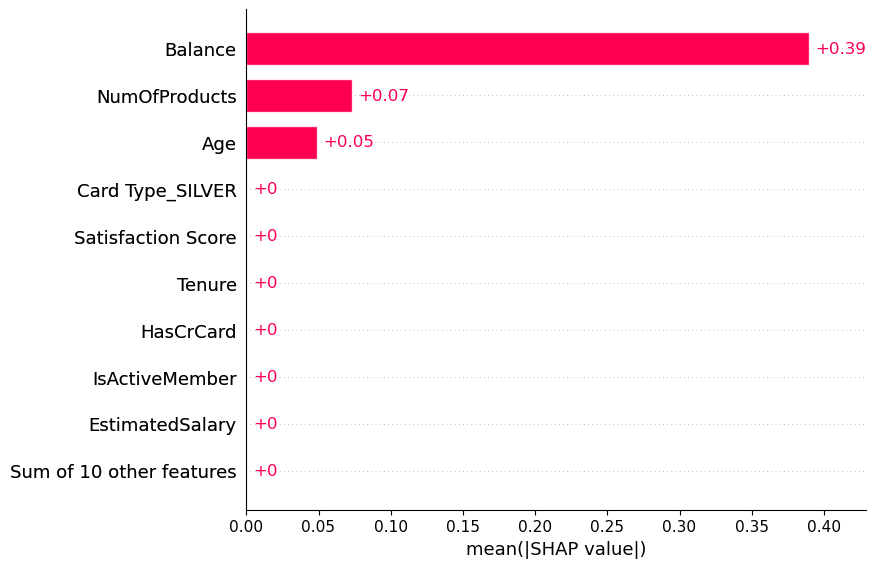

In [37]:
shap.plots.bar(shap_values)

In [ ]:
shap.summary_plot(shap_values)

# Manual Downsampling

In [38]:
temp=X_train.copy()
temp['Exited']=y

In [39]:
y_train.value_counts()

Exited
0    6355
1    1645
Name: count, dtype: int64

In [40]:
data=(temp.groupby('Exited', as_index = False).apply(lambda x: x.sample(n=1645)).reset_index(drop=True))

C:\Users\chris\AppData\Local\Temp\ipykernel_12476\3557791832.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data=(temp.groupby('Exited', as_index = False).apply(lambda x: x.sample(n=1645)).reset_index(drop=True))


In [42]:
X_tr=data.drop('Exited', axis =1 )
y_tr=data['Exited']

In [52]:
X_tr.drop(columns='Complain', inplace=True)

In [53]:
CV.fit(X_tr, y_tr)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__penalty': ['l2']},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__n_estimators': [100],
                          'classifier__n_jobs': [3]},
                         {'classifier': [KNeighborsCl...
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       multi_strategy=None,
                                                       n_estimators=None,
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       random_state=None, ...)],
                          'classifier__learning_rate': [0.1],
                          'classifier__max_depth': [10],
                          'classifier__n_estimators': [100]},
                         {'classifier': [LGBMClassifier()],
                          'classifier__learning_rate': [0.01]}],
             scoring='recall_micro', verbose=1)

In [47]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
6252,596,32,3,96709,2,0,0,41788,1,709,0,1,0,0,1,0,1,0,0
4684,623,43,1,0,2,1,1,146379,2,508,1,0,0,0,1,0,0,0,1
1731,601,44,4,0,2,1,0,58561,1,281,0,0,1,1,0,0,1,0,0
4742,506,59,8,119152,2,1,1,170679,2,979,0,1,0,0,1,0,0,0,1
4521,560,27,7,124995,1,1,1,114669,5,457,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,602,53,5,98268,1,0,1,45038,5,813,0,1,0,1,0,0,0,1,0
8285,609,25,10,0,1,0,1,109895,2,652,1,0,0,0,1,0,0,1,0
7853,730,47,7,0,1,1,0,33373,2,504,1,0,0,1,0,0,0,1,0
1095,692,29,4,0,1,1,0,76755,3,686,1,0,0,0,1,0,0,1,0


In [48]:
X_tr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,621,32,1,0,2,1,1,168779,0,5,781,1,0,0,0,1,0,1,0,0
1,696,30,4,114027,1,1,1,193716,0,2,597,0,1,0,0,1,0,1,0,0
2,447,44,5,89188,1,1,1,75408,0,1,909,1,0,0,1,0,0,0,1,0
3,737,28,8,0,2,1,0,106390,0,2,934,1,0,0,0,1,0,0,0,1
4,759,31,1,109848,1,1,1,42012,0,5,299,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,739,41,8,0,1,1,0,191694,1,1,618,0,0,1,1,0,0,0,1,0
3286,480,44,10,129608,1,1,0,5472,1,1,775,0,1,0,0,1,0,1,0,0
3287,558,39,10,144757,1,1,0,22878,1,4,254,0,1,0,0,1,1,0,0,0
3288,591,51,8,132508,1,1,1,161304,1,5,752,0,1,0,1,0,1,0,0,0


In [46]:
X_test=X_test.drop(columns='Complain')

KeyError: "['Complain'] not found in axis"

In [54]:
print(classification_report(y_test,CV.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1607
           1       0.48      0.77      0.59       393

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.72      2000
weighted avg       0.84      0.79      0.80      2000



In [ ]:
explainer = shap.Explainer(CV.predict, X_test)
shap_values = explainer(X_test)

PermutationExplainer explainer:  90%|█████████████████████████████████████████▏    | 1792/2000 [14:30<01:44,  1.98it/s]

In [ ]:
shap.plots.bar(shap_values)